<h3 style="color:lightblue"><u>IMPORTAMOS LAS BIBLITOTECAS</u></h3>

<h7 style="color:lightblue;"><u>**IMPORTACIÓN DE BIBLIOTECAS**</u></h7>

In [1]:
# import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import f_oneway



<h3 style="color:lightblue"><u>CARGA DE DATOS</u></h3>


In [2]:
df = pd.read_csv("C:/Users/elena/Desktop/EDA/TEMAS EDA/idealista_madrid_e.csv") # IVAN ¿?¿? ruta relativa
df

,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,https://www.idealista.com/inmueble/103960809/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de San Germán,103960809,1475000,4,5,376,Exclusiva vivienda en San GermánEngel & Völker...,"Cuzco-Castillejos, Madrid",Pisos,Madrid MMC - Tetuán y Fuencarral - S6,Engel & Völkers Madrid
911,https://www.idealista.com/inmueble/103494183/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Fuencarral,103494183,865000,2,2,127,"Esta magnífica vivienda, situada en una emblem...","Trafalgar, Madrid",Pisos,Walter Haus Madrid,Walter Haus Madrid
912,https://www.idealista.com/inmueble/102107584/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Castellana,102107584,7900000,5,4,473,"Álvora Capital Properties, consultora inmobili...","Barrio de Salamanca, Madrid",Pisos,álvora capital properties,álvora capital properties
913,https://www.idealista.com/inmueble/99991709/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Costillares,99991709,990000,4,6,293,Espacioso y tranquilo piso en Pinar de Chamart...,"Ciudad Lineal, Madrid",Pisos,Madrid MMC - Conde de Orgaz,Engel & Völkers Madrid


<h3 style="color:lightblue"><u>REVISIÓN GENERAL</u></h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         915 non-null    object
 1   listingUrl                  915 non-null    object
 2   title                       915 non-null    object
 3   id                          915 non-null    int64 
 4   price                       915 non-null    int64 
 5   baths                       915 non-null    int64 
 6   rooms                       915 non-null    int64 
 7   sqft                        915 non-null    int64 
 8   description                 914 non-null    object
 9   address                     915 non-null    object
 10  typology                    915 non-null    object
 11  advertiserProfessionalName  915 non-null    object
 12  advertiserName              915 non-null    object
dtypes: int64(5), object(8)
memory usage: 93.1+ KB


*Todos tienen datos completos excepto la columna **description**, que tiene 914 (uno menos)*
*Esto quiere decir que hay un valor faltante en la descripción.*

*Las más útiles numéricas serían baths, rooms, sqft. También podrías usar variables categóricas (como typology o address) pero habría que transformarlas.*

In [4]:
df.head() # Muestra de los primeros registros del DataFrame

,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid


In [5]:
df.describe()

,id,price,baths,rooms,sqft
count,9.150000e+02,9.150000e+02,915.000000,915.000000,915.000000
mean,1.020578e+08,1.290575e+06,2.900546,3.474317,217.238251
std,5.338810e+06,1.036640e+06,1.626487,1.594625,191.745826
min,2.547319e+07,1.220000e+05,1.000000,0.000000,14.000000
25%,1.019509e+08,6.250000e+05,2.000000,2.000000,104.000000
50%,1.031510e+08,9.900000e+05,3.000000,3.000000,158.000000
75%,1.037703e+08,1.650000e+06,4.000000,4.000000,264.000000
max,1.042055e+08,8.900000e+06,12.000000,12.000000,1768.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

url                           0
listingUrl                    0
title                         0
id                            0
price                         0
baths                         0
rooms                         0
sqft                          0
description                   1
address                       0
typology                      0
advertiserProfessionalName    0
advertiserName                0
dtype: int64

*Después de una breve visualización del data set y ver como se distribuyen, vamos a proceder a quitar las columas que no nos son relevantes.*

In [8]:
df_nuevo= df[['price', 'baths', 'rooms','sqft','address','typology']].copy() # Seleccionamos las columnas relevantes
df_nuevo

,price,baths,rooms,sqft,address,typology
0,1920000,3,3,183,"Recoletos, Madrid",Pisos
1,1995000,3,3,170,"Castellana, Madrid",Pisos
2,1300000,3,4,270,"Hortaleza, Madrid",Pisos
3,1650000,3,3,248,"Chamartín, Madrid",Pisos
4,1590750,3,3,116,"Recoletos, Madrid",Pisos
...,...,...,...,...,...,...
910,1475000,4,5,376,"Cuzco-Castillejos, Madrid",Pisos
911,865000,2,2,127,"Trafalgar, Madrid",Pisos
912,7900000,5,4,473,"Barrio de Salamanca, Madrid",Pisos
913,990000,4,6,293,"Ciudad Lineal, Madrid",Pisos


In [9]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     915 non-null    int64 
 1   baths     915 non-null    int64 
 2   rooms     915 non-null    int64 
 3   sqft      915 non-null    int64 
 4   address   915 non-null    object
 5   typology  915 non-null    object
dtypes: int64(4), object(2)
memory usage: 43.0+ KB


In [10]:
df_nuevo.describe()

,price,baths,rooms,sqft
count,9.150000e+02,915.000000,915.000000,915.000000
mean,1.290575e+06,2.900546,3.474317,217.238251
std,1.036640e+06,1.626487,1.594625,191.745826
min,1.220000e+05,1.000000,0.000000,14.000000
25%,6.250000e+05,2.000000,2.000000,104.000000
50%,9.900000e+05,3.000000,3.000000,158.000000
75%,1.650000e+06,4.000000,4.000000,264.000000
max,8.900000e+06,12.000000,12.000000,1768.000000


In [11]:
df_nuevo.isnull().sum()

price       0
baths       0
rooms       0
sqft        0
address     0
typology    0
dtype: int64

<h7 style="color:lightblue;"><u>**VISUALIZACIÓN DE LA VARIABLE OBJETIVO**</u></h7>

In [12]:
target = 'price'

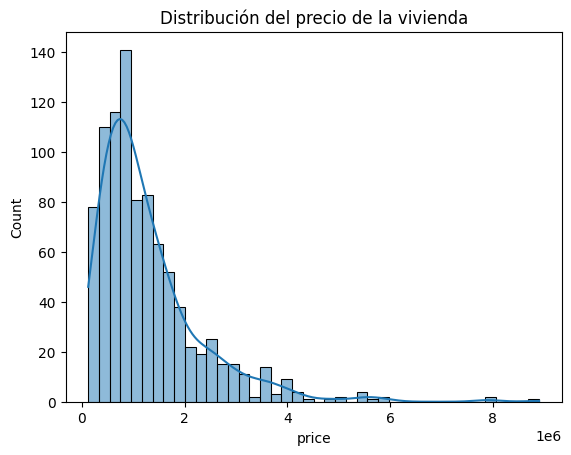

In [13]:
sns.histplot(df_nuevo['price'], kde=True)
plt.title("Distribución del precio de la vivienda")
plt.show()

<Axes: xlabel='price'>

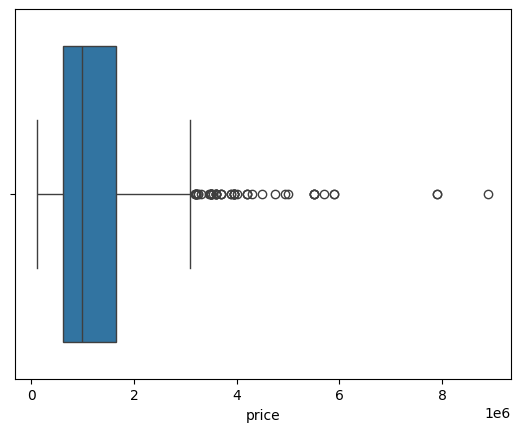

In [14]:
sns.boxplot(x=df_nuevo['price'])

*Se puede observar un gran número de outliers, que posteriormente veremos  
como se comporta con el resto de variables.*

<h3 style="color:lightblue"><u>IDENTIFICAMOS VARIABLES</u></h3>

*Las más útiles numéricas serían baths, rooms, sqft, sin contar con el target que es price.   
También vamos a tener en cuenta variables categóricas (como typology o address) pero tendríamos que transformarlas.*

*Afrontamos un problema de regresión supervisada.*

*Basándonos en:  
Supervisado: Tenemos variables predictoras (X) y una variable objetivo (y = price)  
Regresión: Porque el objetivo es numérico y continuo (price).*

In [15]:
features = ['rooms', 'baths', 'sqft', 'address','typology'] # Variables numéricas y categóricas #typology no se si es útil

In [16]:
X = df_nuevo[['rooms', 'baths', 'sqft', 'address','typology']]  # variables predictoras
y = df_nuevo['price']  # variable objetivo (target)

<h5 style="color:lightblue"><u>ANÁLISIS UNIVARIANTE</u></h5>

<h7 style="color:lightblue;"><u>**Análisis de las variables numéricas**</u></h7>


In [17]:
numericas = X.select_dtypes(include=['int64',]).columns.tolist()
categoricas = X.select_dtypes(include=['object', 'float64']).columns.tolist()

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)

Variables numéricas: ['rooms', 'baths', 'sqft']
Variables categóricas: ['address', 'typology']


In [18]:
X[numericas].describe().T # PREGUNTA PROFE desconozco porque no me pilla la de price.

,count,mean,std,min,25%,50%,75%,max
rooms,915.0,3.474317,1.594625,0.0,2.0,3.0,4.0,12.0
baths,915.0,2.900546,1.626487,1.0,2.0,3.0,4.0,12.0
sqft,915.0,217.238251,191.745826,14.0,104.0,158.0,264.0,1768.0


In [19]:
df_nuevo['baths'].value_counts()

baths
2     301
3     207
1     152
4     120
5      71
6      35
7      14
8       7
9       3
10      3
11      1
12      1
Name: count, dtype: int64

In [20]:
df_nuevo['rooms'].value_counts()

rooms
3     254
2     200
4     184
5     128
1      54
6      50
7      22
8      10
0       8
11      2
10      1
12      1
9       1
Name: count, dtype: int64

In [21]:
df_nuevo['price'].value_counts() # Nº de veces que aparece cada precio

price
850000     15
1200000    14
2500000    13
1650000    12
950000     12
           ..
2650000     1
609000      1
465000      1
1600000     1
1475000     1
Name: count, Length: 393, dtype: int64

In [22]:
df_nuevo['sqft'].value_counts()

sqft
133    12
150    12
120    11
104    11
75     10
       ..
345     1
420     1
482     1
249     1
375     1
Name: count, Length: 351, dtype: int64

In [23]:
df_nuevo['price'].head() 

0    1920000
1    1995000
2    1300000
3    1650000
4    1590750
Name: price, dtype: int64

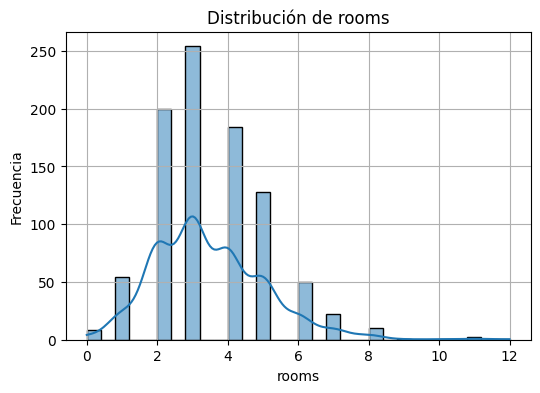

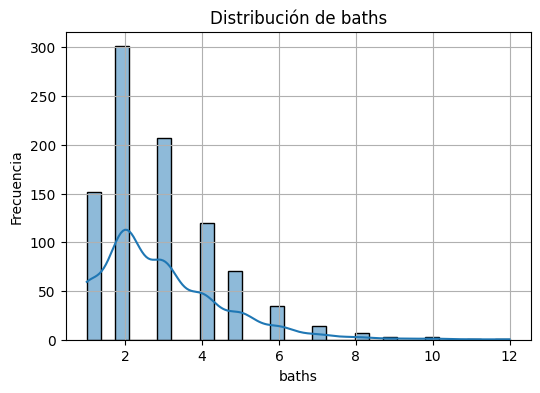

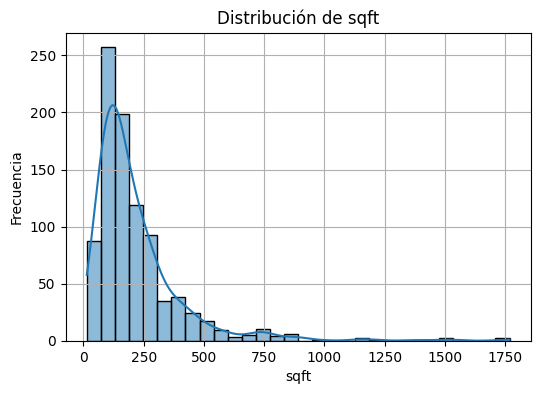

In [24]:
for col in numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()

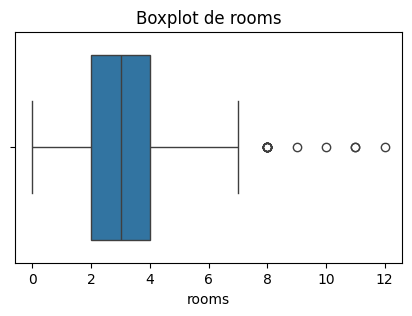

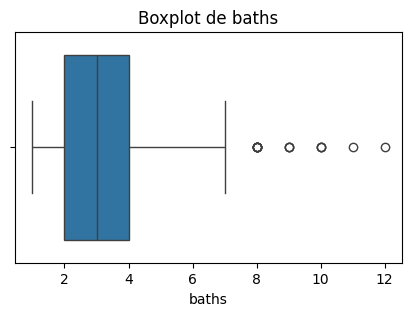

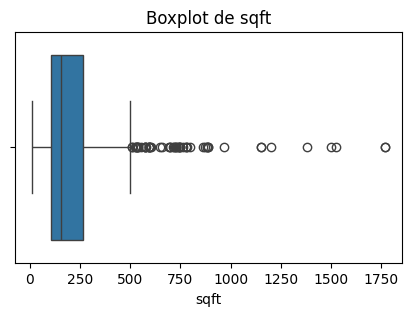

In [25]:
for col in numericas:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

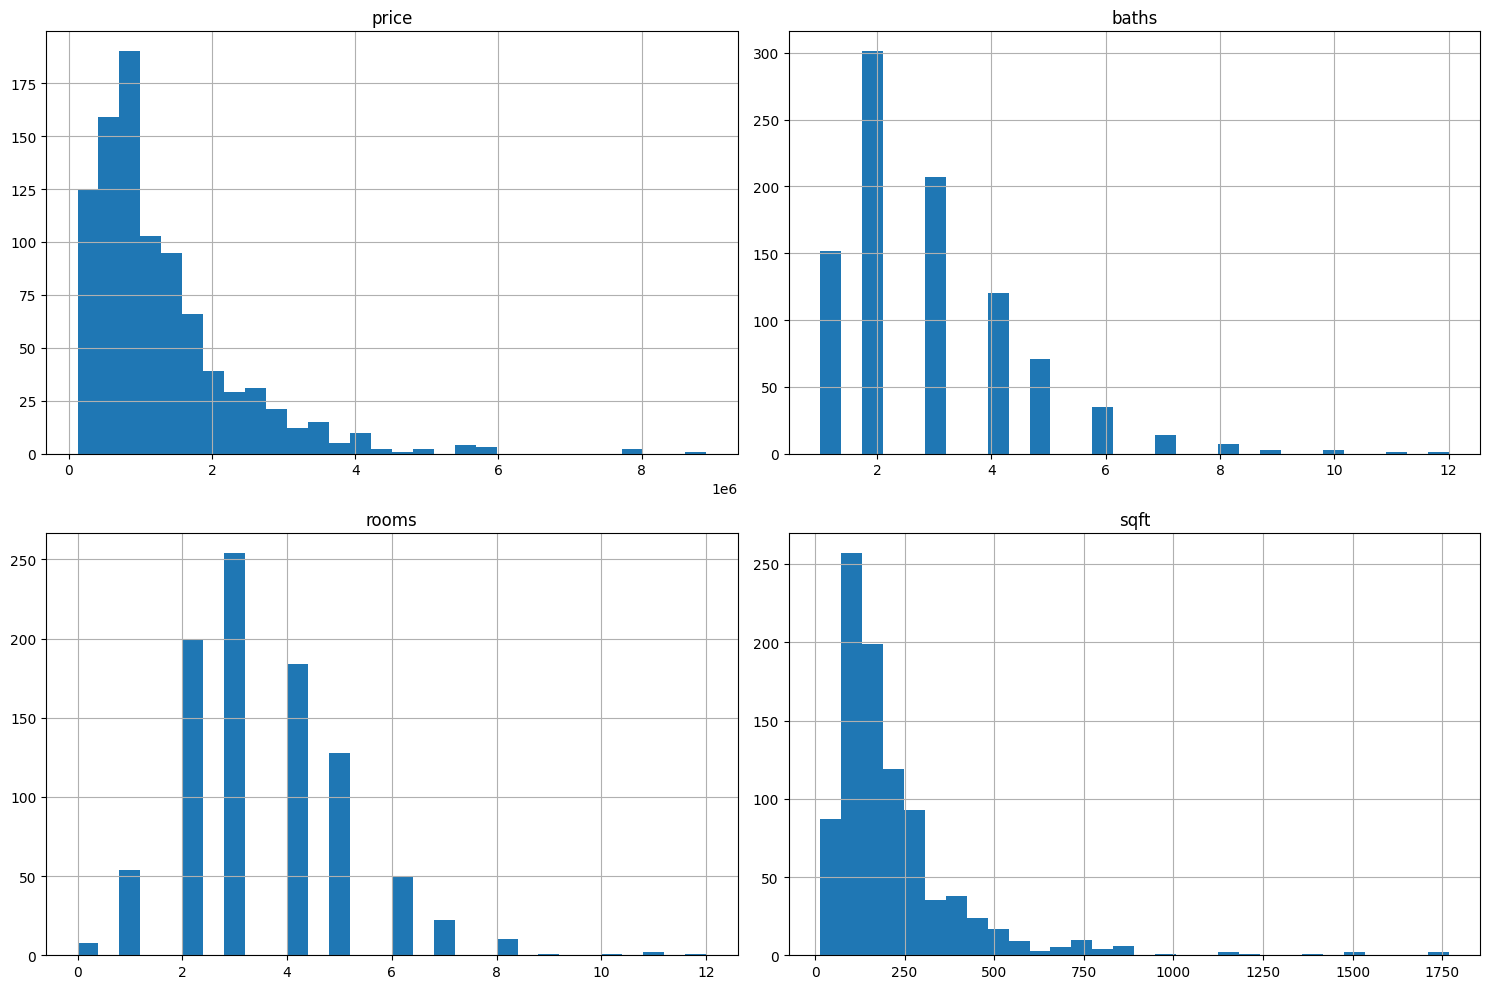

In [26]:
# Exploramos la distribución de las variables numéricasn # ¿?
df_nuevo.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

*Para ir viendolo aunque después profundicemos en ello,  
la correlacion de las númericas con la variable objetivo.*

In [27]:
for col in numericas:
    correl = X[col].corr(y)
    print(f"Correlación entre '{col}' y 'price': {correl:.2f}")

Correlación entre 'rooms' y 'price': 0.56
Correlación entre 'baths' y 'price': 0.69
Correlación entre 'sqft' y 'price': 0.68


<h7 style="color:lightblue;"><u>**Análisis de las variables categóricas (address y typology)**</u></h7>

In [28]:
for col in categoricas:
    print(f"\nConteo de categorías en {col}")
    print(X[col].value_counts())



Conteo de categorías en address
address
Barrio de Salamanca, Madrid           63
Hortaleza, Madrid                     60
Chamartín, Madrid                     54
Moncloa, Madrid                       48
Centro, Madrid                        47
                                      ..
Casco Histórico de Barajas, Madrid     1
El Plantío, Madrid                     1
Arganzuela, Madrid                     1
Canillejas, Madrid                     1
San Juan Bautista, Madrid              1
Name: count, Length: 105, dtype: int64

Conteo de categorías en typology
typology
Pisos             779
Independientes    136
Name: count, dtype: int64


*Nos presenta las dos variables categóricas con las que vamos a trabajar*

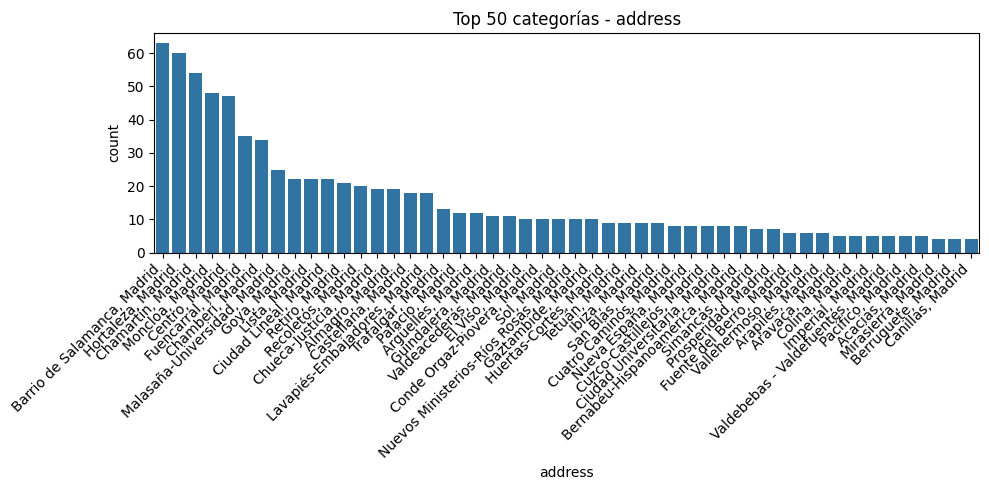

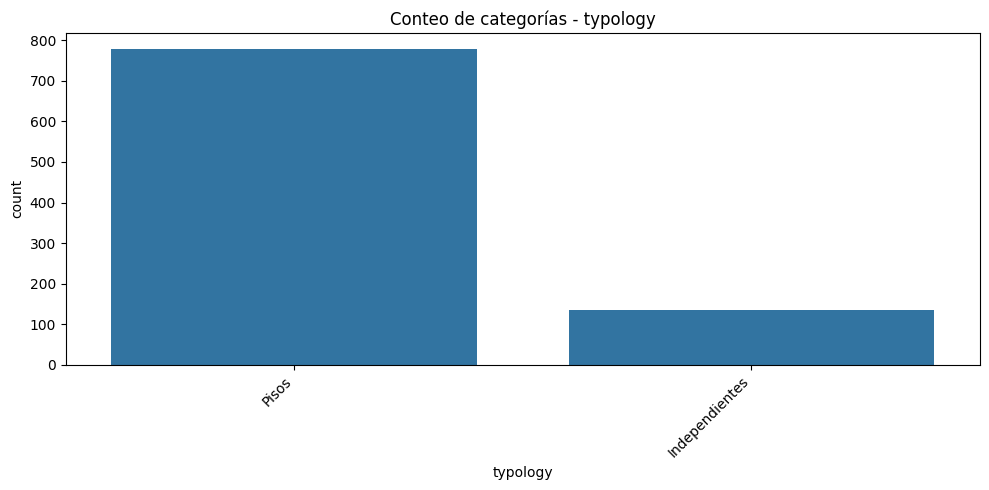

In [29]:
top_n = 50

for col in categoricas:
    plt.figure(figsize=(10, 5))
    
    if col == 'address':
        # Mostrar solo los top-N addresses
        top_categories = X[col].value_counts().nlargest(top_n).index
        data_plot = X[X[col].isin(top_categories)]
        sns.countplot(data=data_plot, x=col, order=top_categories)
        plt.title(f'Top {top_n} categorías - {col}')
    else:
        sns.countplot(data=X, x=col, order=X[col].value_counts().index)
        plt.title(f'Conteo de categorías - {col}')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

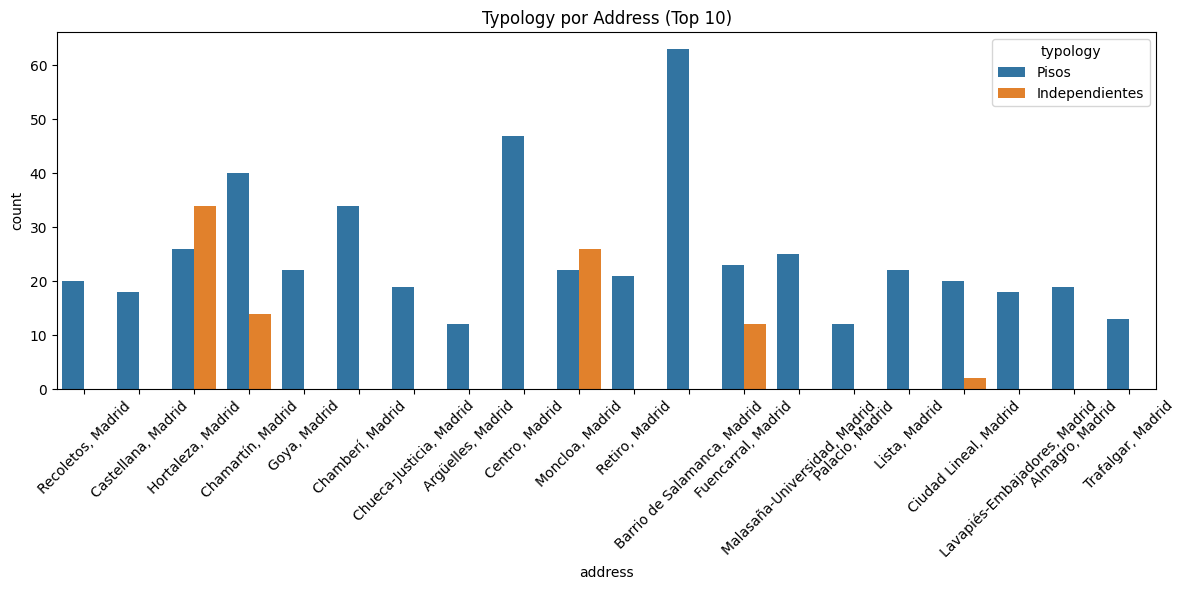

In [30]:
top_n = 20
top_addresses = df_nuevo['address'].value_counts().nlargest(top_n).index
filtered_df = df_nuevo[df_nuevo['address'].isin(top_addresses)]

# 2. Graficamos conteo de typology por address
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x='address', hue='typology')
plt.title('Typology por Address (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
df_nuevo['address'].unique()

array(['Recoletos, Madrid', 'Castellana, Madrid', 'Hortaleza, Madrid',
       'Chamartín, Madrid', 'Cuatro Caminos, Madrid', 'Goya, Madrid',
       'Aravaca, Madrid', 'Sol, Madrid',
       'Bernabéu-Hispanoamérica, Madrid', 'Vallehermoso, Madrid',
       'Huertas-Cortes, Madrid', 'Chamberí, Madrid',
       'Nueva España, Madrid', 'Conde Orgaz-Piovera, Madrid',
       'Chueca-Justicia, Madrid', 'Argüelles, Madrid',
       'Nuevos Ministerios-Ríos Rosas, Madrid', 'Centro, Madrid',
       'Moncloa, Madrid', 'Retiro, Madrid', 'Barrio de Salamanca, Madrid',
       'Peñagrande, Madrid', 'Mirasierra, Madrid', 'Fuencarral, Madrid',
       'Comillas, Madrid', 'Malasaña-Universidad, Madrid',
       'Palos de Moguer, Madrid', 'San Blas, Madrid',
       'Prosperidad, Madrid', 'Bellas Vistas, Madrid',
       'Niño Jesús, Madrid', 'El Viso, Madrid', 'Palacio, Madrid',
       'Lista, Madrid', 'Ciudad Lineal, Madrid',
       'Lavapiés-Embajadores, Madrid', 'Salvador, Madrid',
       'Almagro, Madrid',

**Aquí nos encontramos con que la variable address tiene 105 columnas lo cual nos complicaría a la hora de realizar el modelo  
por ello, vamos a intentar categorizarla o reducir cardinalidad**

In [32]:
frequent_labels = df_nuevo['address'].value_counts()[df_nuevo['address'].value_counts()>20].index
df_nuevo['address'] = df_nuevo['address'].apply(lambda x: x if x in frequent_labels else 'Other')

In [33]:
#mean_prices = df.groupby('address')['price'].mean()
#df_nuevo['address_encoded'] = df_nuevo['address'].map(mean_prices) # Muy útil, pero debemos hacerlo en el cross-validation o en el train only para evitar data leakage

In [35]:
df_nuevo['address'].value_counts()

address
Other                           462
Barrio de Salamanca, Madrid      63
Hortaleza, Madrid                60
Chamartín, Madrid                54
Moncloa, Madrid                  48
Centro, Madrid                   47
Fuencarral, Madrid               35
Chamberí, Madrid                 34
Malasaña-Universidad, Madrid     25
Goya, Madrid                     22
Lista, Madrid                    22
Ciudad Lineal, Madrid            22
Retiro, Madrid                   21
Name: count, dtype: int64

In [36]:
df_nuevo['address'].unique()

array(['Other', 'Hortaleza, Madrid', 'Chamartín, Madrid', 'Goya, Madrid',
       'Chamberí, Madrid', 'Centro, Madrid', 'Moncloa, Madrid',
       'Retiro, Madrid', 'Barrio de Salamanca, Madrid',
       'Fuencarral, Madrid', 'Malasaña-Universidad, Madrid',
       'Lista, Madrid', 'Ciudad Lineal, Madrid'], dtype=object)

<Axes: ylabel='address'>

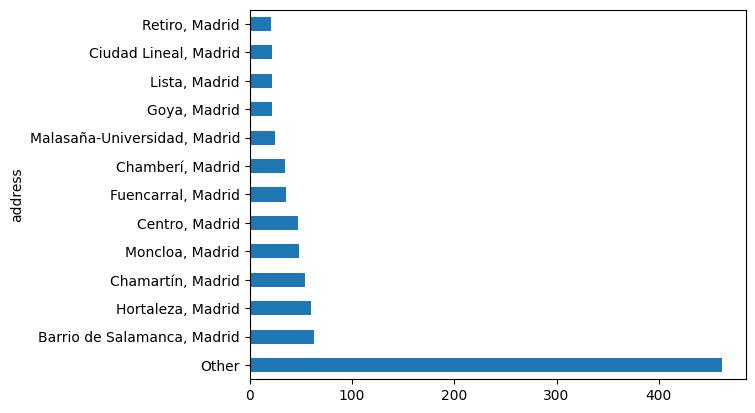

In [37]:
df_nuevo['address'].value_counts().head(20).plot(kind='barh') #Visualizar como están distribuidas las direcciones.

In [38]:
df_nuevo['address'].value_counts() # Nº de veces que aparece cada uno de los componentes de las columnas. # Habría que transformarla. 

address
Other                           462
Barrio de Salamanca, Madrid      63
Hortaleza, Madrid                60
Chamartín, Madrid                54
Moncloa, Madrid                  48
Centro, Madrid                   47
Fuencarral, Madrid               35
Chamberí, Madrid                 34
Malasaña-Universidad, Madrid     25
Goya, Madrid                     22
Lista, Madrid                    22
Ciudad Lineal, Madrid            22
Retiro, Madrid                   21
Name: count, dtype: int64

In [39]:
df_nuevo['typology'].value_counts() # No es numérica pero tenemos dudas sobre si es útil o no.

typology
Pisos             779
Independientes    136
Name: count, dtype: int64

<Axes: ylabel='typology'>

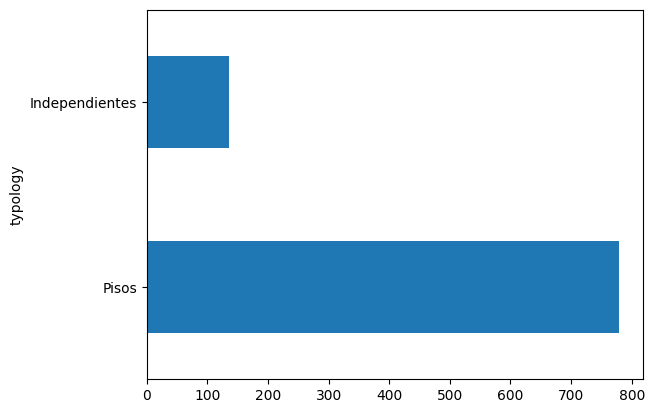

In [40]:
df_nuevo['typology'].value_counts().head(20).plot(kind='barh')

In [41]:
faltantes = X.isnull().sum()
print("Valores faltantes por variable:\n", faltantes[faltantes > 0])


Valores faltantes por variable:
 Series([], dtype: int64)


<h5 style="color:lightblue"><u>ANÁLISIS BIVARIANTE</u></h5>

<Axes: xlabel='typology', ylabel='price'>

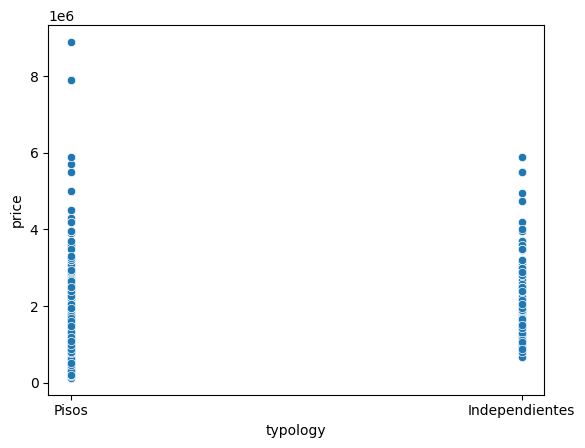

In [42]:
sns.scatterplot(x='typology', y='price', data=df_nuevo) # Queremos ver si hay alguna relación entre la tipología y el precio

<Axes: xlabel='typology', ylabel='price'>

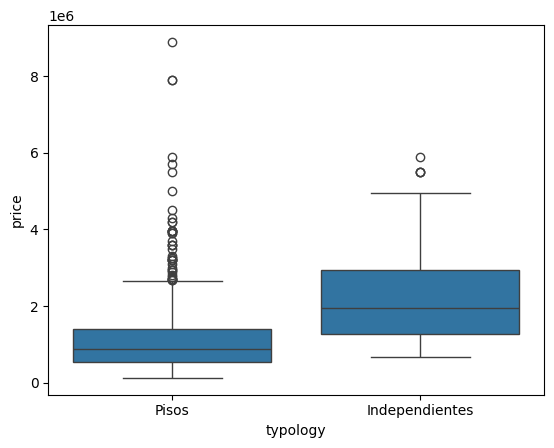

In [43]:
sns.boxplot(x='typology', y='price', data=df_nuevo)

<Axes: xlabel='rooms', ylabel='price'>

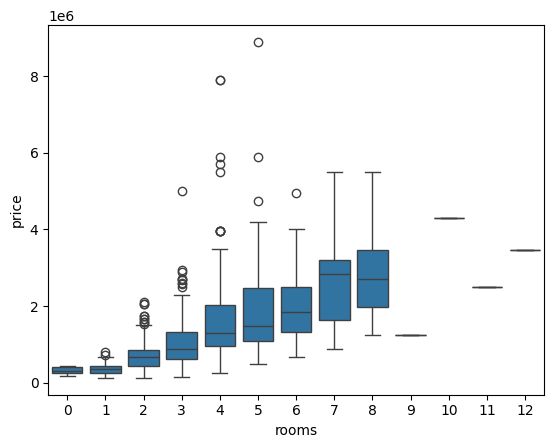

In [44]:
# sns.pairplot(df[['price', 'sqft', 'rooms']])
sns.boxplot(x='rooms', y='price' , data=df_nuevo)

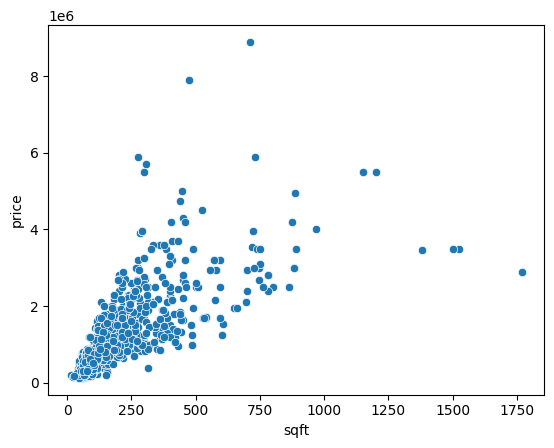

In [45]:
sns.scatterplot(x='sqft', y='price', data=df_nuevo)
plt.show()

<Axes: xlabel='rooms', ylabel='price'>

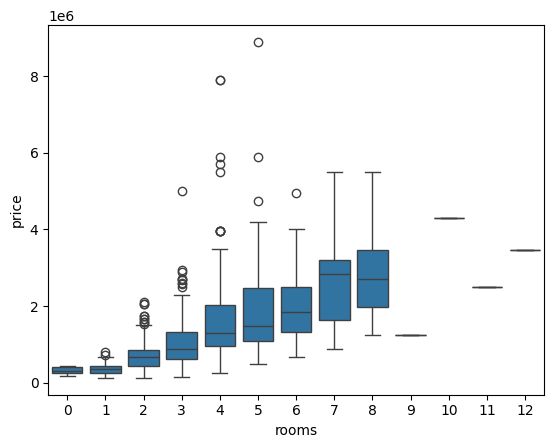

In [46]:
sns.boxplot(x='rooms', y='price', data=df_nuevo)

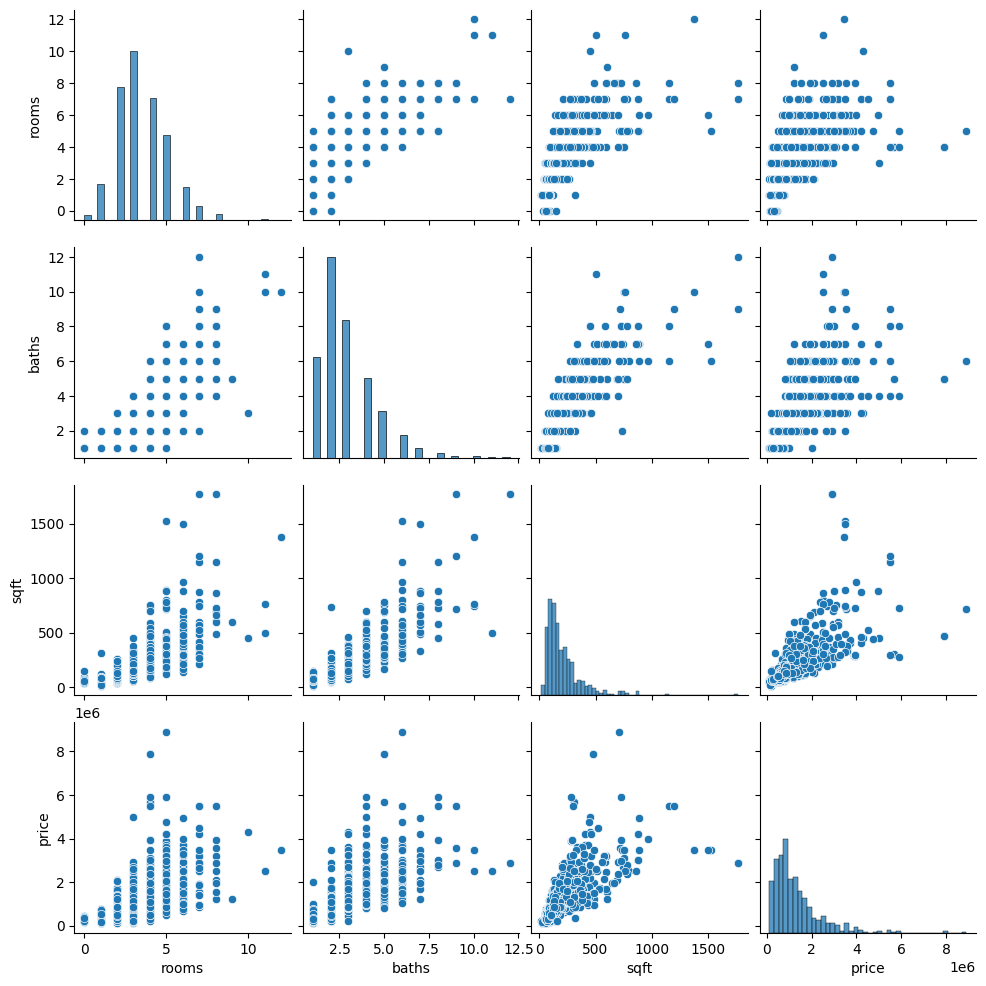

In [47]:
sns.pairplot(df_nuevo[numericas + ['price']])

<h3 style="color:lightblue"><u>TRANSFORMACIÓN DE CATEGÓRICAS A NUMÉRICAS</u></h3>

In [48]:
var_catego = ['address'] # Seleccionamos las variables categóricas

In [49]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Creamos el encoder

In [50]:
encoded = encoder.fit_transform(df_nuevo[var_catego]) # Ajustamos y transformamos

In [51]:
encoded_cols = encoder.get_feature_names_out(var_catego) # Obtenemos los nombres de las columnas codificadas

In [52]:
df_encoded = pd.DataFrame(encoded, columns=encoded_cols) # Lo convertimos en DataFrame


In [53]:
df_encoded.index = df_nuevo.index # Aseguramos que los índices coincidan para concatenar

In [54]:
var_numer = ['rooms', 'baths', 'sqft']

In [55]:
X = pd.concat([df_nuevo[var_numer], df_encoded], axis=1)

In [56]:
y = df_nuevo['price']

In [57]:
df_encoded

,"address_Barrio de Salamanca, Madrid","address_Centro, Madrid","address_Chamartín, Madrid","address_Chamberí, Madrid","address_Ciudad Lineal, Madrid","address_Fuencarral, Madrid","address_Goya, Madrid","address_Hortaleza, Madrid","address_Lista, Madrid","address_Malasaña-Universidad, Madrid","address_Moncloa, Madrid",address_Other,"address_Retiro, Madrid"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
913,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_nuevo

,price,baths,rooms,sqft,address,typology
0,1920000,3,3,183,Other,Pisos
1,1995000,3,3,170,Other,Pisos
2,1300000,3,4,270,"Hortaleza, Madrid",Pisos
3,1650000,3,3,248,"Chamartín, Madrid",Pisos
4,1590750,3,3,116,Other,Pisos
...,...,...,...,...,...,...
910,1475000,4,5,376,Other,Pisos
911,865000,2,2,127,Other,Pisos
912,7900000,5,4,473,"Barrio de Salamanca, Madrid",Pisos
913,990000,4,6,293,"Ciudad Lineal, Madrid",Pisos


In [60]:
#  df.dropna(inplace=True)  HE PENSADO USAR DROPNA PERO ¿?

In [61]:
df_encoded["address_Barrio de Salamanca, Madrid"].value_counts()

address_Barrio de Salamanca, Madrid
0.0    852
1.0     63
Name: count, dtype: int64

*Convertimos la variable categorica de typology en númerica y se me queda en binaria.*

In [63]:
df_nuevo = pd.get_dummies(df_nuevo, columns=['address', 'typology'], drop_first=True, dtype=int)

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['typology']])

In [65]:
df_nuevo

,price,baths,rooms,sqft,"address_Centro, Madrid","address_Chamartín, Madrid","address_Chamberí, Madrid","address_Ciudad Lineal, Madrid","address_Fuencarral, Madrid","address_Goya, Madrid","address_Hortaleza, Madrid","address_Lista, Madrid","address_Malasaña-Universidad, Madrid","address_Moncloa, Madrid",address_Other,"address_Retiro, Madrid",typology_Pisos
0,1920000,3,3,183,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1995000,3,3,170,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1300000,3,4,270,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1650000,3,3,248,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1590750,3,3,116,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1475000,4,5,376,0,0,0,0,0,0,0,0,0,0,1,0,1
911,865000,2,2,127,0,0,0,0,0,0,0,0,0,0,1,0,1
912,7900000,5,4,473,0,0,0,0,0,0,0,0,0,0,0,0,1
913,990000,4,6,293,0,0,0,1,0,0,0,0,0,0,0,0,1


<h3 style="color:lightblue"><u>CORRELACIÓN</u></h3>

In [66]:
def one_hot_encode(df_nuevo, cols):
    return pd.get_dummies(df_nuevo, columns=cols, drop_first=True)

In [67]:
drop_first=True

In [68]:
print(df_nuevo.columns)

Index(['price', 'baths', 'rooms', 'sqft', 'address_Centro, Madrid',
       'address_Chamartín, Madrid', 'address_Chamberí, Madrid',
       'address_Ciudad Lineal, Madrid', 'address_Fuencarral, Madrid',
       'address_Goya, Madrid', 'address_Hortaleza, Madrid',
       'address_Lista, Madrid', 'address_Malasaña-Universidad, Madrid',
       'address_Moncloa, Madrid', 'address_Other', 'address_Retiro, Madrid',
       'typology_Pisos'],
      dtype='object')


In [69]:
categoricas = ['address_Centro, Madrid',
       'address_Chamartín, Madrid', 'address_Chamberí, Madrid',
       'address_Ciudad Lineal, Madrid', 'address_Fuencarral, Madrid',
       'address_Goya, Madrid', 'address_Hortaleza, Madrid',
       'address_Lista, Madrid', 'address_Malasaña-Universidad, Madrid',
       'address_Moncloa, Madrid', 'address_Other', 'address_Retiro, Madrid',
       'typology_Pisos']  # Variables categóricas a transformar
df_onehot = one_hot_encode(df_nuevo, categoricas)

In [70]:
X = df_nuevo[['baths', 'rooms', 'sqft', 'address_Centro, Madrid',
       'address_Chamartín, Madrid', 'address_Chamberí, Madrid',
       'address_Ciudad Lineal, Madrid', 'address_Fuencarral, Madrid',
       'address_Goya, Madrid', 'address_Hortaleza, Madrid',
       'address_Lista, Madrid', 'address_Malasaña-Universidad, Madrid',
       'address_Moncloa, Madrid', 'address_Other', 'address_Retiro, Madrid',
       'typology_Pisos']]  # variables predictoras
y = df_nuevo['price']  # variable objetivo (target)

In [71]:
categoricas = X.select_dtypes(include='object').columns

# Aplicar One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categoricas, drop_first=True)

In [72]:
X_encoded = X.copy()
le = LabelEncoder()

for col in categoricas:
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [73]:
correlation_matrix = X_encoded.corr()

# Ver la correlación con el target (si ya lo uniste al df)
X_encoded['target'] = y
cor_with_target = X_encoded.corr()['target'].sort_values(ascending=False)

print(cor_with_target)

target                                  1.000000
baths                                   0.691625
sqft                                    0.681762
rooms                                   0.557189
address_Moncloa, Madrid                 0.124439
address_Chamartín, Madrid               0.122621
address_Hortaleza, Madrid               0.109707
address_Chamberí, Madrid                0.062451
address_Goya, Madrid                    0.003666
address_Fuencarral, Madrid             -0.000991
address_Lista, Madrid                  -0.032569
address_Centro, Madrid                 -0.041895
address_Retiro, Madrid                 -0.051789
address_Ciudad Lineal, Madrid          -0.051802
address_Malasaña-Universidad, Madrid   -0.081056
address_Other                          -0.168057
typology_Pisos                         -0.369632
Name: target, dtype: float64


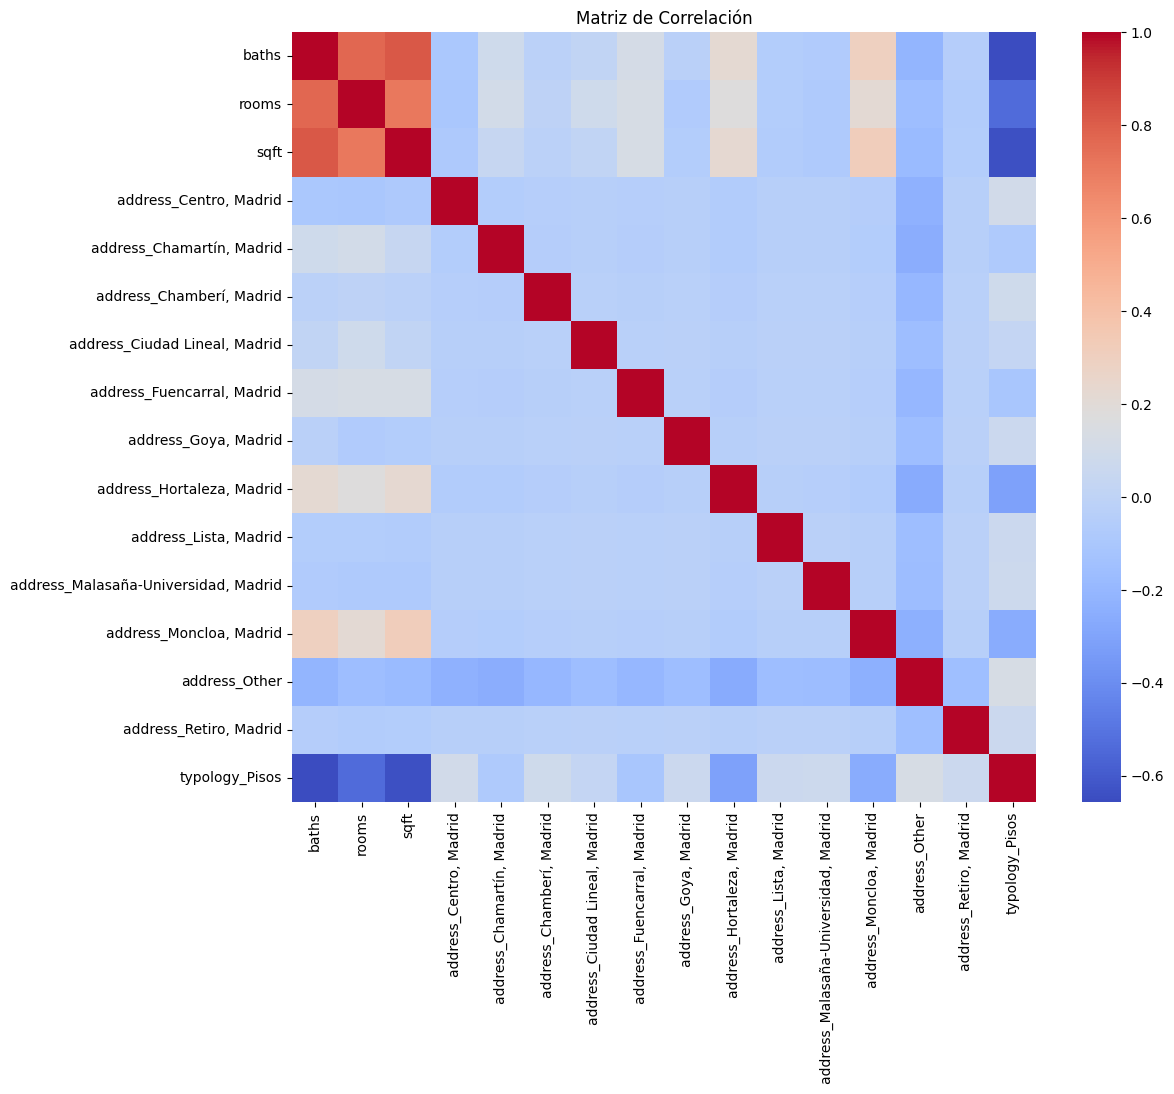

In [74]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()

In [75]:
df_nuevo.corr(numeric_only=True)

,price,baths,rooms,sqft,"address_Centro, Madrid","address_Chamartín, Madrid","address_Chamberí, Madrid","address_Ciudad Lineal, Madrid","address_Fuencarral, Madrid","address_Goya, Madrid","address_Hortaleza, Madrid","address_Lista, Madrid","address_Malasaña-Universidad, Madrid","address_Moncloa, Madrid",address_Other,"address_Retiro, Madrid",typology_Pisos
price,1.000000,0.691625,0.557189,0.681762,-0.041895,0.122621,0.062451,-0.051802,-0.000991,0.003666,0.109707,-0.032569,-0.081056,0.124439,-0.168057,-0.051789,-0.369632
baths,0.691625,1.000000,0.770765,0.818733,-0.098452,0.083791,-0.019970,0.013992,0.117357,-0.025508,0.219906,-0.056230,-0.068103,0.300866,-0.212529,-0.048988,-0.656804
rooms,0.557189,0.770765,1.000000,0.712655,-0.103424,0.102973,-0.004085,0.083107,0.126559,-0.069095,0.176025,-0.055666,-0.079325,0.212942,-0.160655,-0.063930,-0.538780
sqft,0.681762,0.818733,0.712655,1.000000,-0.084149,0.041530,-0.016465,0.010899,0.130428,-0.055033,0.224203,-0.062515,-0.079758,0.315734,-0.178941,-0.058191,-0.639377
"address_Centro, Madrid",-0.041895,-0.098452,-0.103424,-0.084149,1.000000,-0.058275,-0.045713,-0.036524,-0.046407,-0.036524,-0.061643,-0.036524,-0.039000,-0.054752,-0.234996,-0.035664,0.097228
"address_Chamartín, Madrid",0.122621,0.083791,0.102973,0.041530,-0.058275,1.000000,-0.049198,-0.039308,-0.049945,-0.039308,-0.066342,-0.039308,-0.041973,-0.058926,-0.252911,-0.038383,-0.077881
"address_Chamberí, Madrid",0.062451,-0.019970,-0.004085,-0.016465,-0.045713,-0.049198,1.000000,-0.030835,-0.039178,-0.030835,-0.052041,-0.030835,-0.032925,-0.046223,-0.198392,-0.030109,0.082083
"address_Ciudad Lineal, Madrid",-0.051802,0.013992,0.083107,0.010899,-0.036524,-0.039308,-0.030835,1.000000,-0.031302,-0.024636,-0.041579,-0.024636,-0.026306,-0.036931,-0.158510,-0.024056,0.025470
"address_Fuencarral, Madrid",-0.000991,0.117357,0.126559,0.130428,-0.046407,-0.049945,-0.039178,-0.031302,1.000000,-0.031302,-0.052831,-0.031302,-0.033425,-0.046925,-0.201402,-0.030566,-0.108887
"address_Goya, Madrid",0.003666,-0.025508,-0.069095,-0.055033,-0.036524,-0.039308,-0.030835,-0.024636,-0.031302,1.000000,-0.041579,-0.024636,-0.026306,-0.036931,-0.158510,-0.024056,0.065582


In [76]:
df_nuevo.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                                   1.000000
baths                                   0.691625
sqft                                    0.681762
rooms                                   0.557189
address_Moncloa, Madrid                 0.124439
address_Chamartín, Madrid               0.122621
address_Hortaleza, Madrid               0.109707
address_Chamberí, Madrid                0.062451
address_Goya, Madrid                    0.003666
address_Fuencarral, Madrid             -0.000991
address_Lista, Madrid                  -0.032569
address_Centro, Madrid                 -0.041895
address_Retiro, Madrid                 -0.051789
address_Ciudad Lineal, Madrid          -0.051802
address_Malasaña-Universidad, Madrid   -0.081056
address_Other                          -0.168057
typology_Pisos                         -0.369632
Name: price, dtype: float64

In [77]:
print(X.columns)

Index(['baths', 'rooms', 'sqft', 'address_Centro, Madrid',
       'address_Chamartín, Madrid', 'address_Chamberí, Madrid',
       'address_Ciudad Lineal, Madrid', 'address_Fuencarral, Madrid',
       'address_Goya, Madrid', 'address_Hortaleza, Madrid',
       'address_Lista, Madrid', 'address_Malasaña-Universidad, Madrid',
       'address_Moncloa, Madrid', 'address_Other', 'address_Retiro, Madrid',
       'typology_Pisos'],
      dtype='object')


In [78]:
for col in numericas:
    correl = X[col].corr(y)
    print(f"Correlación entre '{col}' y 'price': {correl:.2f}") # Citado anteriormente.

Correlación entre 'rooms' y 'price': 0.56
Correlación entre 'baths' y 'price': 0.69
Correlación entre 'sqft' y 'price': 0.68


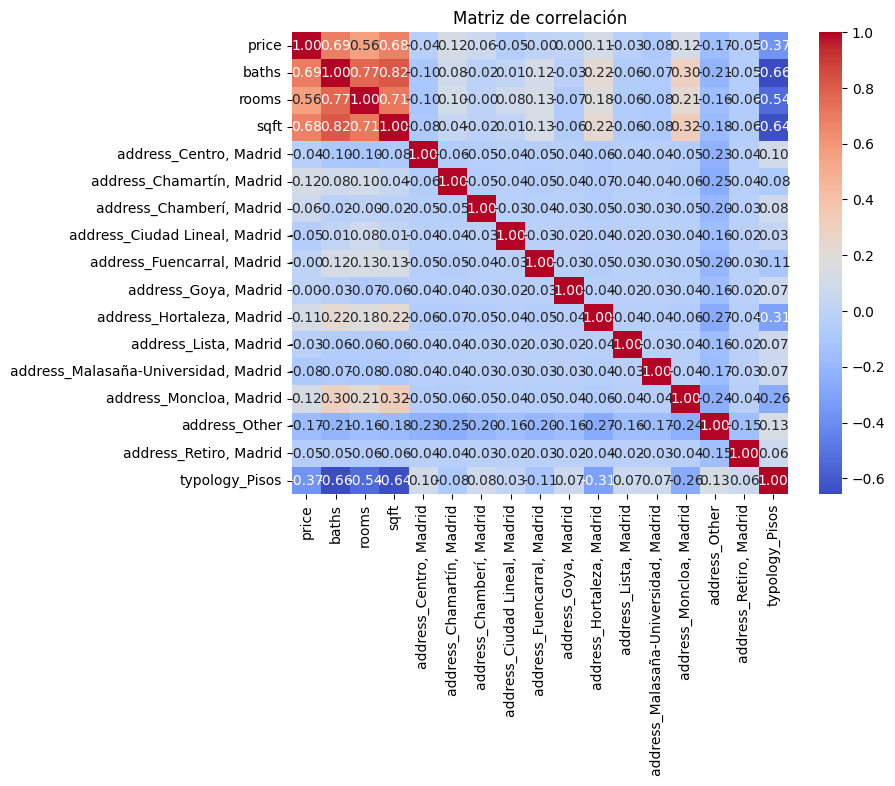

In [79]:

# Matriz de correlación
corr = df_nuevo.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

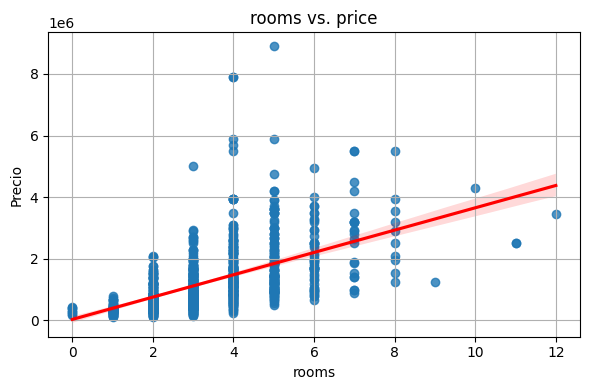

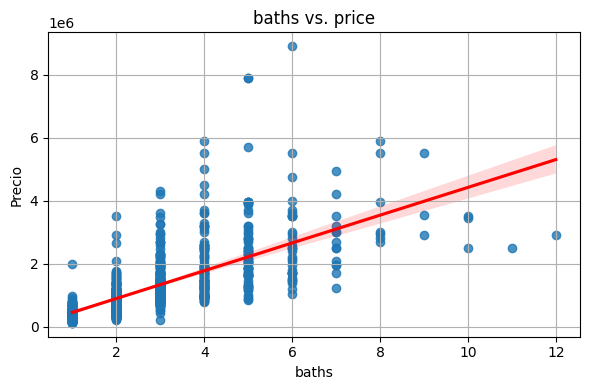

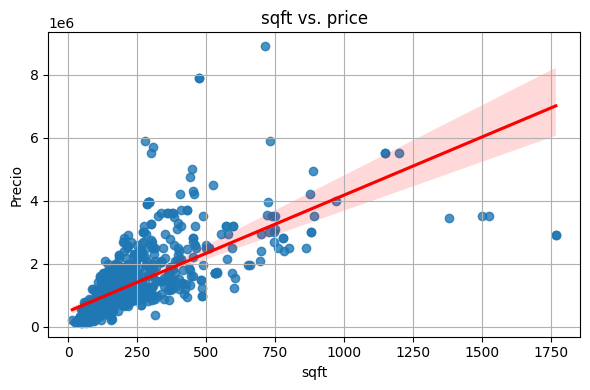

In [80]:
for col in numericas:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=X[col], y=y, line_kws={'color': 'red'})
    plt.title(f'{col} vs. price')
    plt.xlabel(col)
    plt.ylabel('Precio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<h3 style="color:lightblue"><u>SEPARACIÓN DE VARIABLES PREDICTORA Y OBJETIVO</u></h3>

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['baths', 'rooms', 'sqft']  # tus columnas numéricas
df[num_cols] = scaler.fit_transform(df[num_cols])

In [82]:
# address = ['address_Centro, Madrid','address_Chamartín, Madrid', 'address_Chamberí, Madrid','address_Ciudad Lineal, Madrid', 'address_Fuencarral, Madrid',
#       'address_Goya, Madrid', 'address_Hortaleza, Madrid','address_Lista, Madrid', 'address_Malasaña-Universidad, Madrid','address_Moncloa, Madrid', 'address_Other', 'address_Retiro, Madrid']

# 'typology_Pisos'

In [83]:
X = df_nuevo[['rooms', 'baths', 'sqft', 'address_Centro, Madrid','address_Chamartín, Madrid', 'address_Chamberí, Madrid',
              'address_Ciudad Lineal, Madrid', 'address_Fuencarral, Madrid','address_Goya, Madrid', 'address_Hortaleza, Madrid',
              'address_Lista, Madrid', 'address_Malasaña-Universidad, Madrid','address_Moncloa, Madrid', 'address_Other', 'address_Retiro, Madrid','typology_Pisos']]  # variables predictoras
y = df_nuevo['price']  # variable objetivo (target)

<h3 style="color:lightblue"><u>PREPROCESAMIENTO</u></h3>

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X = df_nuevo.drop('price', axis=1)  # Variables independientes
y = df_nuevo['price']    

*Dividimos entre train y test*

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_size=0.2 → 80% entrenamiento, 20% test.

random_state → garantiza reproducibilidad.

<h3 style="color:lightblue"><u>DEFINIMOS LOS PIPELINES CON ESCALADOS Y MODELOS</u></h3>

In [188]:
# Regresión Lineal
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Árbol de Decisión
pipeline_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

# Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Gradient Boosting
pipeline_gbr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

In [189]:
pipeline_lr.fit(X_train, y_train)
pipeline_tree.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_gbr.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0


In [190]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_tree = pipeline_tree.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_gbr = pipeline_gbr.predict(X_test)

<h3 style="color:lightblue"><u>ENTRENAMOS LOS MODELOS</u></h3>

In [191]:
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    print(f"{name} entrenado.") # ENTRENAMOS EL MODELO

Linear entrenado.
Decision Tree entrenado.
Random Forest entrenado.
Gradient Boosting entrenado.


<h3 style="color:lightblue"><u>PREDECIMOS Y EVALUAMOS LOS MODELOS</u></h3>

In [192]:
results = []

for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Modelo': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

df_results = pd.DataFrame(results).sort_values('RMSE')
print(df_results)

              Modelo            MAE           RMSE        R2
3  Gradient Boosting  352291.392127  499168.716587  0.680274
2      Random Forest  357158.557400  502871.222691  0.675513
0             Linear  388805.464901  508319.473272  0.668444
1      Decision Tree  398213.204007  672393.403595  0.419863


In [193]:
results = {
    'Modelo': ['Linear', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_tree),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

              Modelo            MAE           RMSE        R2
0             Linear  388805.464901  508319.473272  0.668444
1      Decision Tree  398213.204007  672393.403595  0.419863
2      Random Forest  357158.557400  502871.222691  0.675513
3  Gradient Boosting  352291.392127  499168.716587  0.680274


*Buscamos hiperparámetros para random forest*

In [194]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(pipelines['Random Forest'], param_grid, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros Random Forest:", grid_rf.best_params_)

# Reemplazar pipeline Random Forest con el mejor modelo encontrado
pipelines['Random Forest'] = grid_rf.best_estimator_

Mejores hiperparámetros Random Forest: {'model__max_depth': 10, 'model__n_estimators': 200}


<h7 style="color:lightblue;"><u>**VOLVEMOS A EVALUAR**</u></h7>

In [195]:
y_pred_rf = pipelines['Random Forest'].predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest optimizado -> MAE: {mae_rf:.3f}, RMSE: {rmse_rf:.3f}, R2: {r2_rf:.3f}")

Random Forest optimizado -> MAE: 351131.798, RMSE: 489792.697, R2: 0.692


In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluar_modelo(y_test, y_pred, nombre_modelo):
    print(f"📊 Resultados para {nombre_modelo}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2:", r2_score(y_test, y_pred))
    print("—" * 30)

evaluar_modelo(y_test, y_pred_lr, "Regresión Lineal")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")
evaluar_modelo(y_test, y_pred_gb, "Gradient Boosting")

📊 Resultados para Regresión Lineal
MAE: 388805.4649013061
MSE: 258388686907.9197
RMSE: 508319.4732723897
R2: 0.6684438486808808
——————————————————————————————
📊 Resultados para Random Forest
MAE: 351131.79751710314
MSE: 239896886338.12445
RMSE: 489792.6973099175
R2: 0.6921719394934128
——————————————————————————————
📊 Resultados para Gradient Boosting
MAE: 352291.39212729543
MSE: 249169407619.1828
RMSE: 499168.7165870702
R2: 0.6802737348709019
——————————————————————————————


<h3 style="color:lightblue"><u>COMPARACIÓN DE MODELOS</u></h3>

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [198]:
results = {
    'Modelo': ['Linear', 'DecisionTree', 'RandomForest', 'GradientBoosting'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_tree),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

             Modelo            MAE           RMSE        R2
0            Linear  388805.464901  508319.473272  0.668444
1      DecisionTree  398213.204007  672393.403595  0.419863
2      RandomForest  351131.797517  489792.697310  0.692172
3  GradientBoosting  352291.392127  499168.716587  0.680274


*MAE = error medio absoluto, cuanto mas bajo sea mejor es el resultado*  
*RMSE = error cuadrático medio (lo elevamos con np.sqrt() para obtener RMSE), en este caso es igual pero es mas sensible a los outliers*  
*R2 = coeficiente de determinación, nos dice qué tan bien se ajusta el modelo, cuanto mas cerca del uno mejor, si da negativo que no es el caso, es mal modelo*  


<h3 style="color:lightblue"><u>TUNING DE LOS MODELOS</u></h3>

In [199]:
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_gb)],
    'R2': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_gb)]
})

print(resultados.sort_values('R2', ascending=False))

              Modelo            MAE        R2
1      Random Forest  351131.797517  0.692172
2  Gradient Boosting  352291.392127  0.680274
0   Regresión Lineal  388805.464901  0.668444


<h3 style="color:lightblue"><u>GUARDAR LOS MODELOS</u></h3>

In [202]:
import joblib

joblib.dump(rf, 'modelo_random_forest.pkl')  # o el modelo que elijas

['modelo_random_forest.pkl']

In [203]:
modelo_cargado = joblib.load('modelo_random_forest.pkl')